# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He wrote a popular article summaring the findings of his analysis.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

**Resources**:

- [Article]
- [Hickey Github Repo]
- [DataQuest Github Repo]

[//]: # (References)
[Article]: https://fivethirtyeight.com/features/fandango-movies-ratings/
[Hickey Github Repo]: https://github.com/fivethirtyeight/data/tree/master/fandango
[DataQuest Github Repo]: https://github.com/mircealex/Movie_ratings_2016_17

In [56]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

#matploblib inline

# Avoid having displayed truncated output
pd.options.display.max_columns = 100

## Understanding the Data

We'll work with two samples of movie ratings:

- One sample was collected as part of Hickey's analysis (from 2015)
- Second sample was collected after for the movies released in 2016 and 2017

Let's start by reading in the two samples (which are stored as CSV files) and getting familiar with their structure.

In [2]:
previous = pd.read_csv('fandango_score_comparison.csv')

after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
print(previous.shape)

print('\nColumns:', previous.columns)

(146, 22)

Columns: Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


In [4]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
print(after.shape)

print('\nColumns:',  after.columns)

(214, 15)

Columns: Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [6]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


---

### Isolate Columns of Interest

Both datasets contain information from several Film Review Sites - Metacritic, Rotten Tomatoes, Fandango, IMDB, etc. 

Since we are only interested in Fandango's ratings, we will filter out those columns of interest to us.

In [7]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
            'Fandango_votes', 'Fandango_Difference']].copy()

fandango_after = after[['movie', 'year', 'fandango']].copy()

In [8]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest is all movie ratings on Fandango's website, regardless of release date.

Our two datasets contain the movie ratings before and after Hickey's analysis. We are interested in sampling the population of these two time periods, so that we can compare the two states and answer our question.

From Hickey's article and the dataset's repository, we observe he included movies that:

- had at least 30 user reviews on Fandango on the date of sampling (Aug. 24, 2015)
- had ticket sales in 2015

As Hickey used a clear set of criteria, the sample he used was not random. Movies with less than 30 reviews or movies that no ticket sales in 2015 were not included in his analyais. There is a high chance that this sample is not representative of our population. For example, the subject could be subject to _temporal trends_: movies in 2015 might have been outstandingly good or bad compared to other years.

The DataQuest dataset that was captured after Hickey's article was published included movies that:

- were the most popular, thus must have had a considerable number of votes and reviews (no exact number provided)
- released in 2016 and 2017 (up to March 22, 2017)

This second sample also doesn't seem very representative of our population as it focuses on movies released in 2016 and 2017 only. It could also be subject to temporal trends.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called [purposive sampling] (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

[//]: # (References)
[purposive sampling]: https://www.youtube.com/watch?v=CdK7N_kTzHI&feature=youtu.be

---


## Changing the Goal of our Analysis

In the previous section, we concluded that the sampling processes were not random, and the resulting samples were very unlikely to be representative of the population we're interested in describing.

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

The term 'popular' is vague, so we will adapt Hickey's benchmark and only consider movies popular if they have at least 30 fan ratings on Fandango's website.

---

## Isolating the Samples We Need

With our goal changed, we have two populations of interest:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

Where popular movies are movies with 30 or more fan ratings on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [10]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The above movie's ratings as of January 2019:

| Movie | No. of Fan Ratings |
| ----- | ------------------ |
| Mechanic: Resurrection | 2,250 |
| Warcraft | 7,280 |
| Max Steel | 494 |
| Me Before You | 5,270 |
| Fantastic Beasts and Where to Find Them | 13,484 |
| Cell | 18 |
| Genius | 127 |
| Sully | 11,890 | 
| A Hologram for the King | 501 |
| Captain America: Civil War | 35,143 |


90% of the movies we randomly sampled are considered popular movies by our own adapted definition. This is enough and gives us the confidence to move forward.

Let's also double check the other data set:

In [18]:
sum(fandango_previous['Fandango_votes'] < 30)

0

### Film Release Dates

In [24]:
fandango_previous.sample(10, random_state = 2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
91,Paddington (2015),4.5,4.3,4045,0.2
126,Woman in Gold (2015),4.5,4.4,2435,0.1
3,Do You Believe? (2015),5.0,4.5,1793,0.5
35,The Loft (2015),4.0,3.6,811,0.4
123,Magic Mike XXL (2015),4.5,4.4,9363,0.1
82,Blackhat (2015),3.0,2.8,1430,0.2
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
12,Leviathan (2014),4.0,3.5,64,0.5
42,About Elly (2015),4.0,3.6,43,0.4
125,The Wedding Ringer (2015),4.5,4.4,6506,0.1


In [23]:
fandango_after.sample(10, random_state = 2)

,movie,year,fandango
23,Bitter Harvest,2017,4.5
155,Table 19,2017,3.0
207,Whiskey Tango Foxtrot,2016,3.5
13,Arsenal,2017,3.5
64,Gold,2016,3.5
131,Pele: Birth of a Legened,2016,4.5
141,Sausage Party,2016,3.5
193,The Secret Life of Pets,2016,4.0
93,Kung Fu Panda 3,2016,4.5
30,Cafe Society,2016,3.5


**Observations**

We observe that the `previous` dataset contains movies that were released before 2015. And the `after` dataset contains movies released after 2016.

For our purposes, we need movies released in 2015 and 2016 only. We need to filter out the movies we don't need.

For Hickey's dataset, we observe that the `FILM` column contains the movie's release year. We can extract the year from this column.

In [29]:
fandango_previous.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [32]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [35]:
# extract year from FILM name
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]

In [64]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [65]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [68]:
# isolate 2015 movies
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()

In [69]:
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

The DataQuest data set already contains a `year` column, which we can use to extract the 2016 movies.

In [44]:
fandango_after.columns

Index(['movie', 'year', 'fandango'], dtype='object')

In [46]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [49]:
# isolate 2016 movies
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()

In [50]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

Now we have our two desired datasets:

- 2015 popular movies
- 2016 popular movies

---

## Comparing the Distribution Shapes for 2015 and 2016

With our datasets ready, we can proceed to compare them. One approach is to compare the shapes of the distributions of movie ratings for both samples.

Let's start by creating two kernel density plots for both datasets.

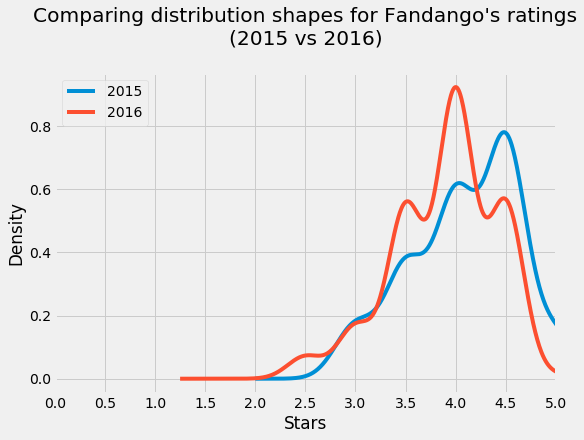

In [82]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward

plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

**Observations**


Both distribution's plot are skewed to the left. This indicates movie ratings lower than 2.0 are very low to nonexistent for both ratings. This suggests that movies on Fandango are given relatively high ratings.

Both shapes are very similar. The 2015 plot peaks around 4.5 while the 2016 plot peaks around 4.0. The 2016 plot also has two smaller peaks around 3.5 and 4.5.

If you center the plots around 3.0 - 4.0, you observe that the 2016 plot centers around 4.0 and seems fairly distributed. The 2015 plot is skewed towards 4.5. There are less movie ratings under 4.0 for the 2015 plot.

The 2016 plot definitely has elements of a normal distribution with 2 mini-peaks while the 2015 plot is very skewed towards 4.5 rating. 2016 distributino is slightly shifted to the left. This does indicate that ratings were slightly lower in 2016 compared to 2015. 

So we can conlude there was definitely a change in Fandango's ratings for popular movies between 2015 and 2016. 2016 movies were rated lower compared to 2015 movies.

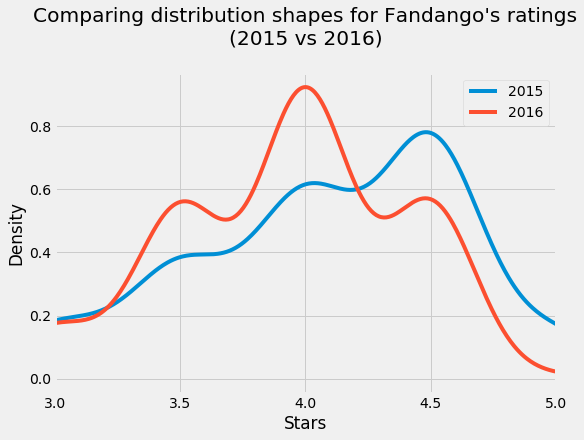

In [84]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward

plt.xlabel('Stars')
plt.xlim(3, 5)
plt.xticks(arange(3,5.1,0.5))
plt.show()

---

## Comparing Relative Frequencies

Through the kernel density plots, we concluded there was indeed a difference in moving ratings for popular movies between 2015 and 2016 on Fandango's website.

To do a deeper analysis, let's look at their freqency tables.

In [91]:
print('2015' + '\n' + '-' * 16)

fandango_2015['Fandango_Stars'].value_counts(normalize=True).iloc[[3,2,1,0,4]] * 100


2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [92]:
print('2016' + '\n' + '-' * 16)

fandango_2016['fandango'].value_counts(normalize=True).iloc[[4,3,2,0,1,5]] * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

**Observations**

2016 dataset has an additional rating (2.5) that 2015 doesn't have. \

---

## Determining the Direction of the Change

---

## Next Steps

---